# Robinson model notes

# Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"><li><span><a href="http://localhost:8890/notebooks/scratch/robinson_spectral_model_notes.ipynb#Overview" data-toc-modified-id="Overview-1">Overview</a></span></li><li><span><a href="http://localhost:8890/notebooks/scratch/robinson_spectral_model_notes.ipynb#Model-Description" data-toc-modified-id="Model-Description-2">Model Description</a></span><ul class="toc-item"><li><span><a href="http://localhost:8890/notebooks/scratch/robinson_spectral_model_notes.ipynb#Parameters" data-toc-modified-id="Parameters-2.1">Parameters</a></span></li><li><span><a href="http://localhost:8890/notebooks/scratch/robinson_spectral_model_notes.ipynb#Equations" data-toc-modified-id="Equations-2.2">Equations</a></span></li></ul></li><li><span><a href="http://localhost:8890/notebooks/scratch/robinson_spectral_model_notes.ipynb#Simulation" data-toc-modified-id="Simulation-3">Simulation</a></span></li><li><span><a href="http://localhost:8890/notebooks/scratch/robinson_spectral_model_notes.ipynb#Model-fitting" data-toc-modified-id="Model-fitting-4">Model fitting</a></span><ul class="toc-item"><li><span><a href="http://localhost:8890/notebooks/scratch/robinson_spectral_model_notes.ipynb#scipy.optimize" data-toc-modified-id="scipy.optimize-4.1">scipy.optimize</a></span><ul class="toc-item"><li><span><a href="http://localhost:8890/notebooks/scratch/robinson_spectral_model_notes.ipynb#Notes" data-toc-modified-id="Notes-4.1.1">Notes</a></span></li><li><span><a href="http://localhost:8890/notebooks/scratch/robinson_spectral_model_notes.ipynb#Implementation" data-toc-modified-id="Implementation-4.1.2">Implementation</a></span></li></ul></li><li><span><a href="http://localhost:8890/notebooks/scratch/robinson_spectral_model_notes.ipynb#scikit-optimize" data-toc-modified-id="scikit-optimize-4.2">scikit-optimize</a></span><ul class="toc-item"><li><span><a href="http://localhost:8890/notebooks/scratch/robinson_spectral_model_notes.ipynb#Notes" data-toc-modified-id="Notes-4.2.1">Notes</a></span></li><li><span><a href="http://localhost:8890/notebooks/scratch/robinson_spectral_model_notes.ipynb#Implementations" data-toc-modified-id="Implementations-4.2.2">Implementations</a></span></li></ul></li><li><span><a href="http://localhost:8890/notebooks/scratch/robinson_spectral_model_notes.ipynb#tensorflow" data-toc-modified-id="tensorflow-4.3">tensorflow</a></span><ul class="toc-item"><li><span><a href="http://localhost:8890/notebooks/scratch/robinson_spectral_model_notes.ipynb#Notes" data-toc-modified-id="Notes-4.3.1">Notes</a></span></li><li><span><a href="http://localhost:8890/notebooks/scratch/robinson_spectral_model_notes.ipynb#Implementations" data-toc-modified-id="Implementations-4.3.2">Implementations</a></span></li></ul></li><li><span><a href="http://localhost:8890/notebooks/scratch/robinson_spectral_model_notes.ipynb#STAN" data-toc-modified-id="STAN-4.4">STAN</a></span><ul class="toc-item"><li><span><a href="http://localhost:8890/notebooks/scratch/robinson_spectral_model_notes.ipynb#Notes" data-toc-modified-id="Notes-4.4.1">Notes</a></span></li><li><span><a href="http://localhost:8890/notebooks/scratch/robinson_spectral_model_notes.ipynb#Implementations" data-toc-modified-id="Implementations-4.4.2">Implementations</a></span></li></ul></li></ul></li><li><span><a href="http://localhost:8890/notebooks/scratch/robinson_spectral_model_notes.ipynb#Graveyard" data-toc-modified-id="Graveyard-5">Graveyard</a></span></li></ul></div>

## Overview

The following notes aim to distil the essential components of the (spectal-domain version of the) Robinson thalamocortical neural field model, including initial python implementations. 

We focus on the model as described in Rowe et al. 2004 *"Estimation of neurophysiological parameters from the waking EEG using a biophysical model of brain dynamics"* (J. Theoretical Biology).

(get the paper [here](https://github.com/Lefebvrelab/spectral_neural_models/raw/master/notes/papers/Rowe2004__estimation_of_neurophysiological_parameters.pdf))

But also draw on some additional information from other sources where useful. 

## Model Description

Summarized here is all of the essential information about the spectral-domain Robinson thalamocortical model, as described in Rowe et al. 2004: 

Namely, a) Equations that are actually used in the model, and parameter values, and b) parameter and variable values, units, and meanings. 





### Parameters

Rowe et al. 2004 Table 1

Quantity                     | Range     | Nominal |  Unit            |  Description
--------------------         | --------- | -----   |  -----------     | ------------
$\sigma_{e,I}$               | 3-8       | 3.3     | $mV$             | ...
$\theta_{e,I}$               | 10-25     | 15      | $mV$             | ...
$\alpha$                     | 35-150    | 40      | $s^{-1}$         | ...
$\beta / \alpha $            | 1-8       | 4.0     | -                | ...
$r_e$                        | 60-100    | 80      | $mm$             | ...
$r_i,r_r,r_s$                | ~0.1      | -       | $mm$             | ...
$v_a $                       | 5-10      | 8       | $m s^{-1}$       | ...
$t_0$                        |  60-100   |  84     |  $ms$            | ...
$K_0$                        | 10-50     |  30     |  $m^{-1}$        | ...
$v_{ee},v_{es},v_{se}$       |  0.05-10  |  1.2    |  $mV s$          | ...
$-v_{ei}$                    |  0.05-10  |  1.8    |  $mV s$          | ...
$v_{re}$                     |  0.05-10  |  0.4    |  $mV s$          | ...
$v_{rs}$                     |  0.05-10  |  0.2    |  $mV s$          | ...
$-v_{sr}$                    |  0.05-10  |  0.8    |  $mV s$          | ...
$v_{sn} \phi_n$              |  0.05-10  |  1.0    |  $mV s$          | ...
$\gamma_e$                   |  50-200   |  130    |  $s^{-1}$        | ...
$\gamma_i,\gamma_r,\gamma_s$ |  ~10^4    |  -      |  $s^{-1}$        | ...
$Q_a$                        |  100-1000 |  250    |  $s^{-1}$        | 
$\phi_a$                     |  1000-6000|  -      |  $V^{-1} d^{-1}$ | 
$G_{ee}$                     |  1-20     |  6      |  -               | 
$-G_{ei}$                    |  1-20     |  7      |  -               | 
$-G_{srs}$                   |  0.01-2.5 |  0.4    |  -               | 
$-G_{esre}$                  |  0.5-10   |  3      |  -               | 
$G_{ese}$                    |  0.1-10   |  5      |  -               | 

### Equations

Below are the equations in Rowe et al. 2004 that need to be implemented for simulations and model fitting.

For further description + explanation, see the paper. 

\begin{aligned}
L( \omega ) =& (1 - i \omega / \alpha)^{-1} (1 - i \omega / \beta)^{-1}
\end{aligned}
<div align='right'> (4) </div>

( where $\omega = 2 \pi f$ is angular frequency and $f$ is frequency in Hz)

\begin{aligned}
\phi_{s} =& T \phi_n + S \phi_e \\
\end{aligned}
<div align='right'> (8) </div>

\begin{aligned}
T =& \frac{L G_{sn} e^{i \omega t_0 / 2 }}{1 - L G_{sr} L G_{rs} } \\
\end{aligned}
<div align='right'> (9) </div>

\begin{aligned}
S =& \frac{(L G_{se} + L G_{sr} L G_{re} ) e^{i \omega t_0 / 2} }{1 - L G_{sr} L G_{rs} } \\
\end{aligned}
<div align='right'> (10) </div>

\begin{aligned}
P_{EEG}(\omega) =& P_0  \bigg \lvert \frac{L(\omega) T / G_{sn} } {1 - G_{ie} L(\omega)} \bigg \rvert ^2 \frac{(2 \pi )^2}{l_x l_y} \
\times \displaystyle \sum_{m,n=-\infty}^{\infty} \frac{e^{-k_{m,n}^2 / k_0^2}}{1} { \lvert k_{m,n}^2 r_e^2 + q^2(\omega) r_e^2 \rvert ^2 }   \\
\end{aligned}
<div align='right'> (11) </div>

\begin{aligned} 
q^2 (\omega) r_e^2 =& \bigg ( 1 - \frac{i \omega}{\gamma_e} \bigg ) ^2   \
- \frac{G_{ee} L(\omega) + G_{es} L(\omega) S}{1 - G_{ei} L(\omega)} \\
\end{aligned}
<div align='right'> (12) </div>


\begin{aligned}
P_0 =& \frac{ \pi \lvert \phi_n \rvert ^2 }{r_e^2} G_{es} G_{sn} \\
\end{aligned}
<div align='right'> (13) </div>

\begin{aligned}
k_{m,n}^2 r_e^2 =& (2 \pi m r_e / l_x )^2 + (2 \pi n r_e / l_y)^2 \\
\end{aligned}
<div align='right'> (14) </div>

\begin{aligned}
P_{EMG} (f) =& \frac{A(f/f_c)^2}{ [1+ (f/f_c)^2]^{1+ \delta / 2} } \\
\end{aligned}
<div align='right'> (15) </div>

\begin{aligned}
f_{pk} =& \sqrt{ \frac{2}{\delta} } f_c
\end{aligned}
<div align='right'> (15) </div>

## Simulation

---

***Initial Note:***

Model optimization APIs across multiple toolboxes and programming languages often follow the following general format:
    
`result = somoptimizationfunction(myfun,x0,options...)`

where 

- `somoptimizationfunctoion` is the model fitting function in question, 
- `myfun` is the function we want to optimize (in this case our neural field model), 
- `x0` is a vector of initial values for model parameters, and
- `myfun` accepts the parameter vector as an input argument (i.e. `output = myfunc(x0)`, where `output` is the quantity that will be minimized\maximizeed )

( See for example the `scipy.optimize` [tutorial](https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html) )

So we want to make sure we write our simulation function accordingly. 

---

Importage

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from numpy import pi,abs,exp

Model class

In [7]:
class Rowe2004Model(object):

    def __init__(self,freqs=None,alpha = 88.,gamma = 71.8, t_0 = 79.2,
                 G_ee = 3.8,G_ei = -8.,G_ese = 10.8, G_esre = -5.7,
                 G_srs = -0.34, p_0 = 2.94,
                 r_e=80.):
        
        # Initialize parameters
        
        self.freqs = freqs
        
        # Table 1
        self.sigma_e = 3.3
        self.theta_e = 15.
        self.alpha = 40.
        self.beta_over_alpha = 4.0
        self.beta = self.beta_over_alpha * self.alpha
        
        
        self.r_e = 80.
        self.r_i = self.r_r = self.r_s = None
       
        #self.r_e = 0.08 # from Rowe et al. 2004
        #self.r2 = self.r**2
       
        
        self.va = 8.
        self.t0 = 84.
        self.k0 = 30.
        self.v_ee = self.v_es = self.v_se = 1.2
        self.v_ei = -1.8
        self.v_re = 0.4
        self.v_rs = 0.2
        self.v_sr = -0.8

        self.v_sn_phi_n = 1.0

        self.gamma_e = 130.

        self.gamma_i = self.gamma_r = self.gamma_s = 10E4

        self.Q_a = 250.

        self.G_ee = 6.
        self.G_ei = -7.
        self.G_srs = -0.4
        self.G_esre = -3. 
        self.G_ese = 5.  # G_ese = G_es * G_se

        self.G_es = -0.03 # from Robinson et al. 2001. Can this be calculated from other numbers??
        self.G_se = self.G_ese / self.G_es
        
   
        self.G_rs = 0.1  # from Abeysuria 2015
        self.G_sr = self.G_srs / self.G_rs 

        self.G_re = 0.2  # from Abeysuria 2015
        
        
        self.G_sn = 1. # JG random choice
        self.G_ie = 1. # JG random choice
        
        
        self.lx = 0.5 # from Abeysuria. Unit = m.
        self.ly = 0.5 # from Abeysuria. Unit = m.
        
        
        #self.phi_n = np.random.rand(1,self.freq)  # Rowe et al. 2004 "The driving signalfnis approximated as white noise inspace and time, as in our previous work"
        self.phi_n = np.random.rand(1,self.freqs.shape[0])
        
        
        
        self.freq_min = 5.
        self.freq_max = 100
        
        self.fmax = 50. # near eqn. 14 Rowe
        
        
        
    def compute_L(self,omega):
        # Rowe et al. Eq 
    
        a,b = self.alpha,self.beta
    
        # omega = 2 pi f is angular frequency
        # f is freq in Hz
        L = (1. - 1j*omega / a)**-1 * (1 - 1j*omega / b ) **-1
        return L


    def compute_T(self,omega):
        # Rowe et al. Eq. 9
        
        G_sn,G_sr,G_rs,t0 = self.G_sn,self.G_sr,self.G_rs,self.t0
    
        L = self.compute_L(omega)
    
        T = ( L*G_sn * exp(1j*omega *t0 / 2.)  )  / ( 1 - L*G_sr * L * G_rs)
    
        return T


    def compute_S(self,omega):
        
        G_se,G_sr,G_re,G_rs,t0 = self.G_se,self.G_sr,self.G_re,self.G_rs,self.t0
    
        # Rowe et al. Eq. 10
    
        L = self.compute_L(omega)
    
        S = ( (L * G_se + L * G_sr + L * G_re ) * exp(1j*omega*t0 / 2.) ) / ( 1. - L * G_sr * L * G_rs)
    
        return S


    def compute_q2r2(self,omega):
        
        G_ee,G_es,G_ei,gamma_e = self.G_ee,self.G_es,self.G_ei,self.gamma_e
        
        # Eq 12
        L = self.compute_L(omega)
        S = self.compute_S(omega)
    
        q2r2 = ( 1 - ((1j * omega) / gamma_e))**2    - ( (G_ee * L + G_es * L * S ) / (1 - G_ei * L) )
    
        return q2r2




    def compute_P0(self):
        
        # Eq 13
        
        phi_n,G_es,G_sn,r_e = self.phi_n,self.G_es,self.G_sn,self.r_e
        
        P0 = (( pi * abs(phi_n)**2 ) / r_e**2 ) * G_es * G_sn

        return P0

    def compute_k2r2(self,m,n):
    
        r_e,lx,ly = self.r_e,self.lx,self.ly
    
        term1 = (2. * pi ** m * r_e / lx)**2
        term2 = (2. * pi * n * r_e / ly)**2
    
        return term1 + term2

    
    def compute_P_EEG(self):
    
        G_sn,G_ie,lx,ly,r_e = self.G_sn,self.G_ie,self.lx,self.ly,self.r_e
        k0 = self.k0
        
        P0 = self.compute_P0()
        L = self.compute_L(self.freqs)
        T = self.compute_T(self.freqs)
        q2r2 = self.compute_q2r2(self.freqs)
        
        fmax = self.fmax
        
        
        term1  = P0 * abs(  ((L * T) / G_sn) / ( 1- G_ie * L ) )** 2 * (2 * pi)**2 / (lx*ly)
            
        term2 = 0
        for m in np.arange(-fmax,fmax):
            for n in  np.arange(-fmax,fmax):
                
                k2r2 = self.compute_k2r2(m,n)
                k2 = k2r2/(r_e**2.)
                
                term2+= (exp((-k2**2)/(k0**2)) ) /  abs(k2 * r_e**2. + q2r2) **2                          
                          
                    
        
                    
        return term1 * term2                
        

Produce some power spectra with this model

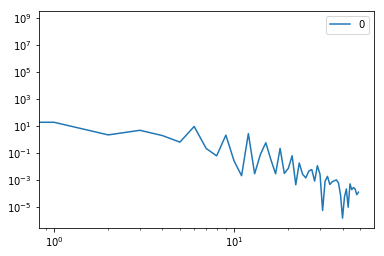

In [106]:
freqs = np.linspace(0.001,100)
mod = Rowe2004Model(freqs=freqs)

L = mod.compute_L(freqs)
S = mod.compute_S(freqs)
P0 = mod.compute_P0()#freqs)

EEG = mod.compute_P_EEG()#freqs)

df_EEG = pd.DataFrame(np.squeeze(EEG))

df_EEG.abs().plot(logx=True,logy=True)

In [105]:
EEGs = []
n_runs = 100
for i in range(n_runs):
    mod = Rowe2004Model(freqs=freqs)
    EEGs.append(mod.compute_P_EEG())                

EEGs = np.squeeze(np.array(EEGs))
df_EEGs = pd.DataFrame(EEGs,columns=freqs)
df_EEGs.columns.names = ['freq (Hz)']

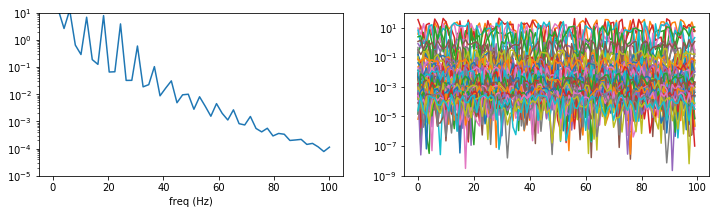

In [102]:
fig, ax  =plt.subplots(ncols=2, figsize=(12,3))

df_EEGs.abs().mean().plot(ylim=[0.00001,10.],logy=True,ax=ax[0])
df_EEGs.abs().plot(legend=False,logy=True,ylim=[0.000000001,100.],ax=ax[1])

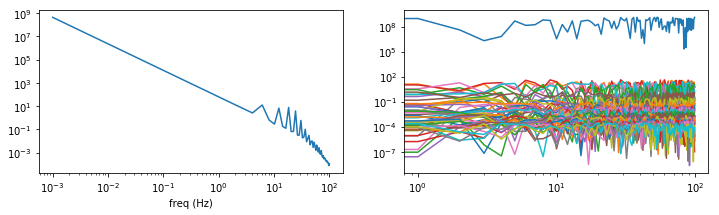

In [103]:
fig, ax  =plt.subplots(ncols=2, figsize=(12,3))

df_EEGs.abs().mean().plot(logx=True,logy=True,ax=ax[0])
#df_EEGs.abs().plot(legend=False,logy=True,ylim=[0.000000001,100.],ax=ax[1])
df_EEGs.abs().plot(legend=False,logx=True,logy=True,ax=ax[1])

## Model fitting

Note: See the above note on conventions for model fitting APIs. 

Make a function that wraps the model simulation stuff above to give a function with the properties necessary for `scipy.optimize` etc.

In [2]:
def gen_ps(params,options=None):
    mod = Rowe2004Model()
    eeg = mod.compute_P_EEG(freqs)
    
    # compare eeg to data
    fit = eeg - data
    
    return fit

---

In [ ]:
Make a 

### scipy.optimize

#### Notes

Would be nice if we had an analytic form for the Jacobian for this system to help with gradient-based optimization.
That is supplied to e.g. `scipy.optimize.minimize` through the `jac` argument: 

`scipy.optimize.minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)[source]`

#### Implementation

In [3]:
from scipy.optimize import minimize

In [ ]:
params_arr = []

res = minimize(gen_ps,params_arr)

### scikit-optimize

#### Notes

#### Implementations

### tensorflow

#### Notes

Ultimately, a 'proper' tensorflow implementation would probably use implement the model equations within tensorflow's own (clunky, annoying) API syntax. 

However there is functionality in tensorflow for 

#### Implementations

### STAN

#### Notes

( See Marmaduke Woodman and Tim Proix's epilepsy work with this approach )

#### Implementations